In [339]:
from scipy import spatial
import numpy as np
import pylab as plt
%matplotlib inline

# GP Prior

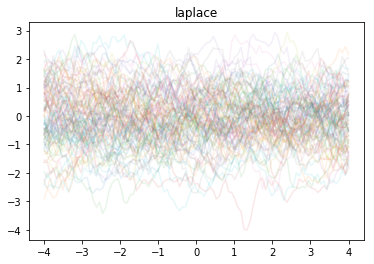

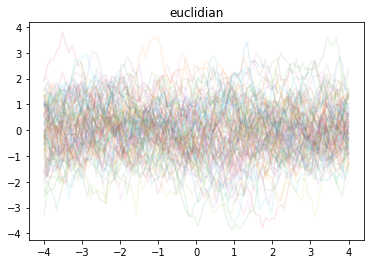

In [340]:
for distance, kernel_name in zip(['seuclidean', 'euclidean'], 
                                 ['laplace', 'euclidian']):
    xa = np.linspace(-4,4, 100).reshape(-1, 1)
    cov = spatial.distance.cdist(xa, xa, distance)
    for i in range(100):
        plt.plot(xa, np.random.multivariate_normal(np.zeros_like(xa.flatten()), np.exp(-cov)), alpha=.1)
    plt.title(kernel_name)
    plt.show()

# Gaussian processes for linear regression

Let us first try to fit a sinus functions with a gaussian process with two different kernels: laplace kernel and gaussian kernel

In [342]:
def rbf_kernel(xa, xb):
    return 0.1*np.exp(- spatial.distance.cdist(xa, xb, 'euclidean')**2)

def laplace_kernel(xa, xb):
    return 0.1*np.exp(- spatial.distance.cdist(xa, xb, 'seuclidean')**2)

def generate_kernels(xa, test_set, kernel=rbf_kernel):
    kxtx = kernel(xa, test_set.reshape(-1, 1))
    kxxt = kernel(test_set.reshape(-1, 1), xa)

    kxx = kernel(test_set.reshape(-1, 1),test_set.reshape(-1, 1))
    kxtxt = kernel(xa, xa)
    return kxtx, kxxt, kxx, kxtxt
kxtx, kxxt, kxx, kxtxt = generate_kernels(xa, test_set)

In [343]:
func_to_fit = np.sin
test_set = np.array([-3, -2,-1, 0, 1, 2, 3])
def get_mean_and_variance(xa, test_set, func_to_fit, kernel=rbf_kernel):
    kxtx, kxxt, kxx, kxtxt = generate_kernels(xa, test_set, kernel=kernel)
    test_target = func_to_fit(test_set.reshape(-1, 1))
    mu = (kxtx@ np.linalg.inv(kxx)) @ test_target
    sigma = (kxtxt - (kxtx @ np.linalg.inv(kxx)@ kxxt ))
    return xa, test_target, mu, sigma, 

# Looking at the results

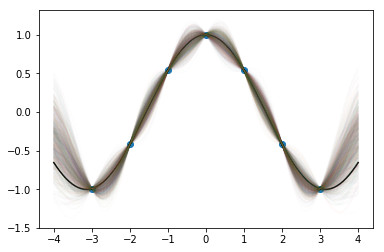

In [345]:
fx = np.cos
xa, test_target, mu, sigma =get_mean_and_variance(xa, test_set, fx, kernel=rbf_kernel)
plt.plot(xa, fx(xa), c='black')
plt.scatter(test_set, test_target)
for i in range(1000):
    plt.plot(xa, np.random.multivariate_normal(mu.flatten(), sigma), alpha=0.01)
ax1 = plt.gca()

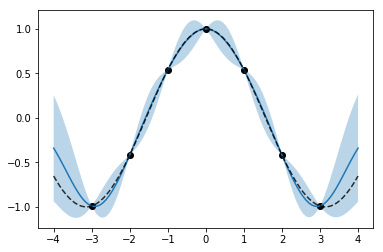

In [346]:
fx = np.cos
xa, test_target, mu, sigma =get_mean_and_variance(xa, test_set, fx, kernel=rbf_kernel)
sample = np.random.multivariate_normal(mu.flatten(), sigma, size=1000)
plt.fill_between(x=xa.flatten(), 
                 y1=mu.flatten() + 2 * np.std(sample, axis=0), 
                 y2=mu.flatten() - 2 * np.std(sample, axis=0), 
                alpha=0.3)
plt.plot(xa, mu.flatten())
plt.plot(xa, fx(xa), color='black', ls='--', alpha=0.8)
plt.scatter(test_set,fx(test_set), c='black')
ax2 = plt.gca()